In [2]:
import glob
import pandas as pd
import sklearn.preprocessing as PP
import sklearn.model_selection as MS
import sklearn.linear_model as LM
import sklearn.metrics as MT
import matplotlib.pyplot as plt
import sklearn.feature_selection as FS
from sklearn.svm import LinearSVR, SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

# Load data

In [24]:
import networkx as nx
import json
data = json.load(open('river_network.json', 'r'))
river_network = nx.node_link_graph(data)

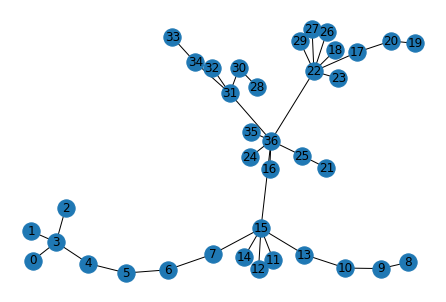

In [25]:
nx.draw(river_network, with_labels=True)

In [6]:
# data = {}

# for file in glob.glob('data/monitordata/dam_*.csv'):
#     name = 'dam_' + file[file.find('_') + 1: file.find('.')]
#     df = pd.read_csv(file)
#     df.Date = pd.to_datetime(df.Date)
#     df = df.set_index('Date').sort_index()
#     df = df.rename(columns = {'WaterArea': 'Data'})
#     data[name] = df

# ddams = pd.concat([df.Data for df in data.values()], axis = 1)
# ddams.columns = data.keys()
# ddams = ddams.fillna(method = 'backfill').dropna()

# for file in glob.glob('data/monitordata/rw_*.csv'):
#     name = 'rw_' + file[file.find('_') + 1: file.find('.')]
#     df = pd.read_csv(file)
#     df.Date = pd.to_datetime(df.Date)
#     df = df.set_index('Date').sort_index()
#     df = df.rename(columns = {'Daily runoff (mm)': 'Data'})
#     data[name] = df

# drw = pd.concat([value.Data for key, value in data.items() if key.startswith('rw')], axis = 1)
# drw.columns = [key for key in data if key.startswith('rw')]
# drw = drw.dropna()

# df = pd.concat([ddams, drw], axis = 1).dropna()
# df

In [26]:
# df.to_csv('data.csv')
df = pd.read_csv('data.csv', index_col = 'Date')

# Transform data using Standard Scaler

In [8]:
scaler = PP.StandardScaler().fit(df)
df_transformed = pd.DataFrame(data = scaler.transform(df), columns = df.columns)

# Survey data

In [9]:
def apply_regressor(X, Y, regressor, scorer = MS.cross_val_score):
    return scorer(regressor, X, Y, cv = 7, scoring = 'r2').mean()
def survey(df, outCol, inpCols, regressors, period = 15, future = 1):
    outCol = df[outCol].values.reshape(-1)
    inpCols = df[inpCols].values
    X, Y = [], []
    for i in range(len(df) - (period + future - 1)):
        X.append(inpCols[i:i + period,:].reshape(-1))
        Y.append(outCol[i + future + period - 1])
    res = {}
    for name, regressor in regressors:
        res[name] = [apply_regressor(X, Y, regressor)]
    return pd.DataFrame(data = res, index = ['Score mean'])

## Regressors

In [20]:
estimators = [
    ('lr', LM.Ridge(1)),
    ('svr', SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False))
]
stacking = StackingRegressor(estimators=estimators, final_estimator=AdaBoostRegressor(n_estimators=50))

regressors = [('Ridge', LM.Ridge()),
              ('Linear', LM.LinearRegression()),
              ('Lasso', LM.Lasso(random_state=42)),
              ('Adaboost', AdaBoostRegressor(n_estimators=100, base_estimator=DecisionTreeRegressor(max_depth=4))),
              ('SVR', SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)),
              ('Stacking', stacking)
             ]

Node: dam_Haixihai, neighbors: ['dam_Xiaowan']


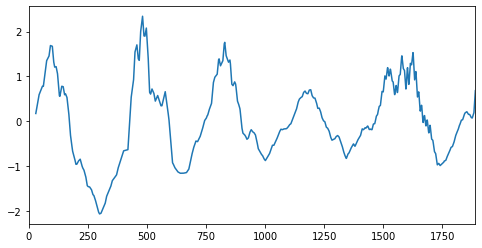

---------------------------------------------------------------


,Ridge,Linear,Lasso,Adaboost,SVR,Stacking
Self data,0.927902,0.926683,-0.098500,0.736619,0.937482,0.836258
Neighborhood data,0.924308,0.922711,-0.098500,0.722727,0.934308,0.799241
Exclusive data,0.531077,0.530719,-0.159921,0.459277,0.542055,0.483743



Node: dam_Zibihe, neighbors: ['dam_Xiaowan']


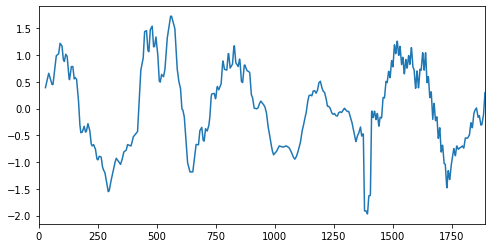

---------------------------------------------------------------


,Ridge,Linear,Lasso,Adaboost,SVR,Stacking
Self data,0.875414,0.874488,-0.128675,0.442825,0.887276,0.608634
Neighborhood data,0.869565,0.867390,-0.128675,0.471303,0.887325,0.660290
Exclusive data,0.452731,0.452154,-0.141633,-0.360390,0.498458,0.317952



Node: dam_Gongguoqiao, neighbors: ['dam_Xiaowan']


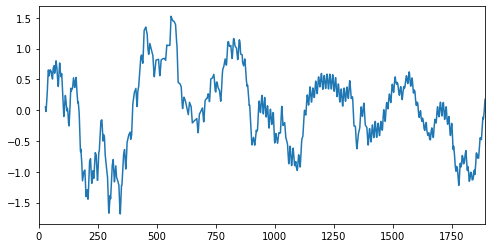

---------------------------------------------------------------


,Ridge,Linear,Lasso,Adaboost,SVR,Stacking
Self data,0.843585,0.843491,-0.209887,0.535744,0.831717,0.696318
Neighborhood data,0.835047,0.834132,-0.209887,0.571518,0.834803,0.702594
Exclusive data,0.144721,0.144022,-0.209887,0.101120,0.136019,0.085935



Node: dam_Xiaowan, neighbors: ['dam_Haixihai', 'dam_Zibihe', 'dam_Gongguoqiao', 'dam_Manwan']


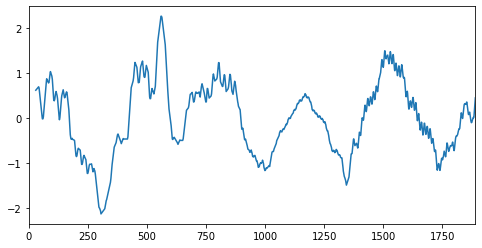

---------------------------------------------------------------


,Ridge,Linear,Lasso,Adaboost,SVR,Stacking
Self data,0.897210,0.896977,-0.357789,0.684249,0.896277,0.825844
Neighborhood data,0.879441,0.874596,-0.357789,0.599853,0.893332,0.837270
Exclusive data,0.362897,0.356597,-0.362857,0.300811,0.403201,0.441908



Node: dam_Manwan, neighbors: ['dam_Xiaowan', 'dam_Dachaoshan']


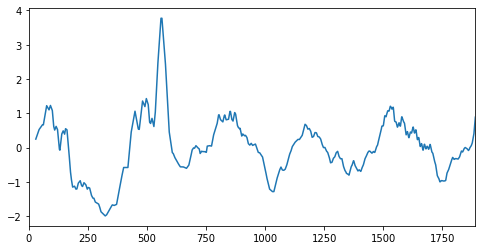

---------------------------------------------------------------


,Ridge,Linear,Lasso,Adaboost,SVR,Stacking
Self data,0.917565,0.917429,-0.044466,0.672025,0.921048,0.786530
Neighborhood data,0.911684,0.908426,-0.044466,0.695474,0.921459,0.776221
Exclusive data,0.727864,0.726860,-0.146702,0.544625,0.724053,0.576268



Node: dam_Dachaoshan, neighbors: ['dam_Manwan', 'dam_Nuozhadu']


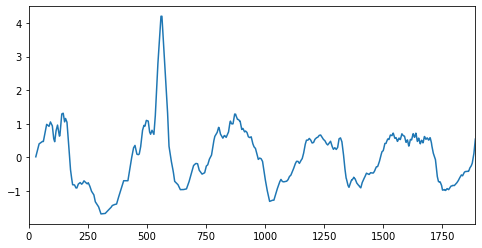

---------------------------------------------------------------


,Ridge,Linear,Lasso,Adaboost,SVR,Stacking
Self data,0.930015,0.929758,0.025809,0.772605,0.935153,0.794408
Neighborhood data,0.926199,0.923670,0.025809,0.707250,0.934996,0.802429
Exclusive data,0.602892,0.601814,-0.073427,0.640456,0.649049,0.518550



Node: dam_Nuozhadu, neighbors: ['dam_Dachaoshan', 'dam_Jinghong']


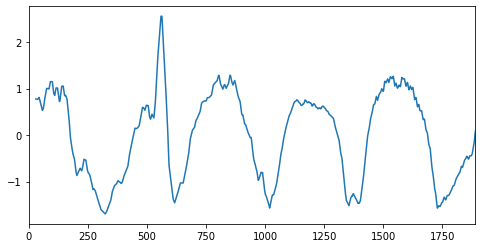

---------------------------------------------------------------


,Ridge,Linear,Lasso,Adaboost,SVR,Stacking
Self data,0.965740,0.965657,-0.221000,0.879401,0.965767,0.908764
Neighborhood data,0.963675,0.963341,-0.221000,0.867358,0.964477,0.912304
Exclusive data,0.474010,0.473560,-0.247949,0.419929,0.423941,0.438567



Node: dam_Jinghong, neighbors: ['dam_Nuozhadu', 'rw_239']


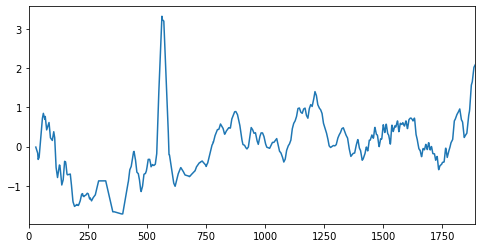

---------------------------------------------------------------


,Ridge,Linear,Lasso,Adaboost,SVR,Stacking
Self data,0.855247,0.854797,-0.495164,0.390998,0.862095,0.719166
Neighborhood data,0.835963,0.832264,-0.495164,0.477115,0.862058,0.733196
Exclusive data,-0.729004,-0.731167,-0.539845,-0.772483,-0.649550,-0.746554



Node: dam_Nam Ngum 5, neighbors: ['dam_Nam Ngum 2']


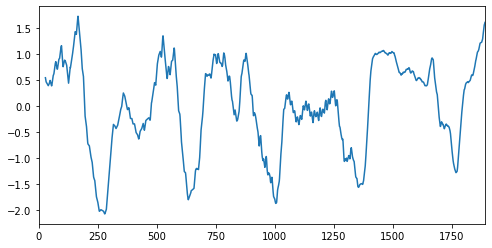

---------------------------------------------------------------


,Ridge,Linear,Lasso,Adaboost,SVR,Stacking
Self data,0.905130,0.90500,-0.543194,0.752657,0.903270,0.849911
Neighborhood data,0.903301,0.90237,-0.543194,0.757795,0.905740,0.859889
Exclusive data,0.219356,0.21865,-0.553156,0.097512,0.183429,0.134003



Node: dam_Nam Ngum 2, neighbors: ['dam_Nam Ngum 5', 'dam_Nam Ngum']


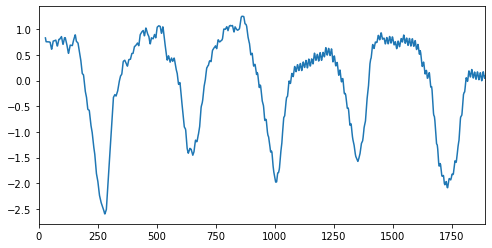

---------------------------------------------------------------


,Ridge,Linear,Lasso,Adaboost,SVR,Stacking
Self data,0.950481,0.950486,-0.749889,0.797844,0.948626,0.918717
Neighborhood data,0.947860,0.947431,-0.749889,0.810440,0.946074,0.907076
Exclusive data,0.347570,0.347371,-0.795505,0.432412,0.340806,0.296648



Node: dam_Nam Ngum, neighbors: ['dam_Nam Ngum 2', 'rw_242']


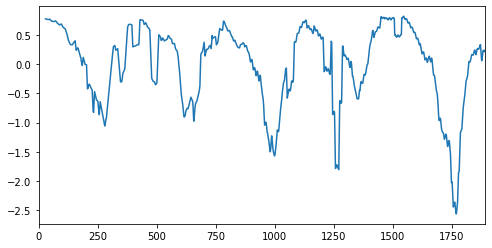

---------------------------------------------------------------


,Ridge,Linear,Lasso,Adaboost,SVR,Stacking
Self data,0.636684,0.634369,-0.375986,-0.124772,0.676329,0.130772
Neighborhood data,0.595014,0.588362,-0.375986,0.106060,0.670203,0.389967
Exclusive data,-0.160109,-0.163689,-0.375986,-0.049487,0.145432,-0.822054



Node: dam_Nam Leuk, neighbors: ['rw_239']


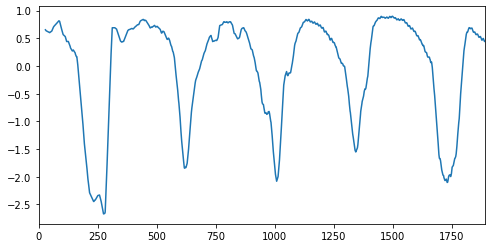

---------------------------------------------------------------


,Ridge,Linear,Lasso,Adaboost,SVR,Stacking
Self data,0.965676,0.965477,-1.131556,0.898178,0.965703,0.912726
Neighborhood data,0.961678,0.961008,-1.131556,0.892623,0.960956,0.921195
Exclusive data,-1.885266,-1.885780,-1.391184,-2.632392,-1.562737,-2.205139



Node: dam_Nam Mang 3, neighbors: ['rw_239']


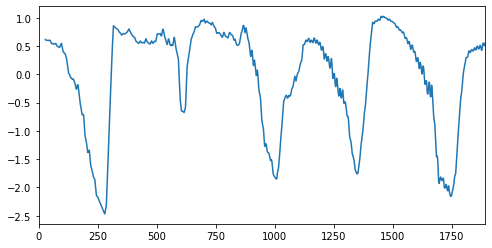

---------------------------------------------------------------


,Ridge,Linear,Lasso,Adaboost,SVR,Stacking
Self data,0.889542,0.889415,-1.973915,0.744827,0.888560,0.746578
Neighborhood data,0.883954,0.883394,-1.973915,0.731190,0.885325,0.772984
Exclusive data,-2.498697,-2.499249,-2.207175,-2.738892,-2.292800,-3.476790



Node: rw_242, neighbors: ['dam_Nam Ngum', 'rw_239']


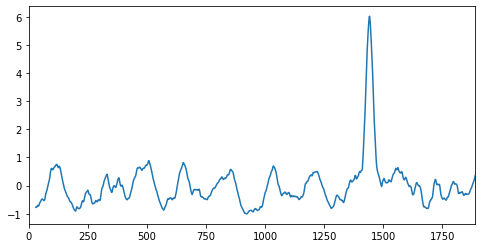

---------------------------------------------------------------


,Ridge,Linear,Lasso,Adaboost,SVR,Stacking
Self data,0.902293,0.901670,-0.039365,0.708130,0.904405,0.738763
Neighborhood data,0.885260,0.884096,-0.039365,0.714251,0.892986,0.731725
Exclusive data,-0.679815,-0.680484,-0.181329,-0.016572,-0.319587,-2.545940



Node: dam_Nam Theun 2, neighbors: ['rw_239']


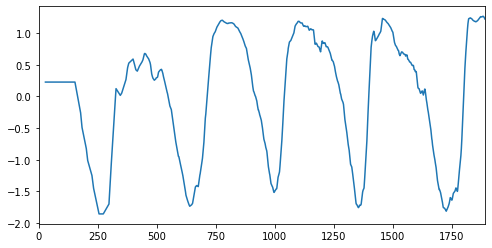

---------------------------------------------------------------


,Ridge,Linear,Lasso,Adaboost,SVR,Stacking
Self data,0.973997,0.973851,-0.297073,0.937708,0.972295,0.945097
Neighborhood data,0.973303,0.973099,-0.297073,0.946250,0.971368,0.944978
Exclusive data,-0.699599,-0.699792,-0.404306,-0.489708,-0.873123,-0.617049



Node: rw_239, neighbors: ['dam_Jinghong', 'dam_Nam Leuk', 'dam_Nam Mang 3', 'rw_242', 'dam_Nam Theun 2', 'rw_34']


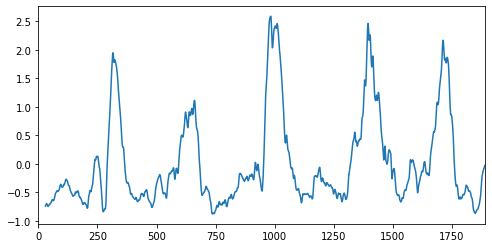

---------------------------------------------------------------


,Ridge,Linear,Lasso,Adaboost,SVR,Stacking
Self data,0.900520,0.900447,-0.111096,0.819441,0.900709,0.837289
Neighborhood data,0.861475,0.855110,-0.111096,0.813605,0.873917,0.798319
Exclusive data,-0.834080,-0.842860,-0.140451,-0.143903,-0.426408,-0.718089



Node: dam_Nam Pung, neighbors: ['rw_34']


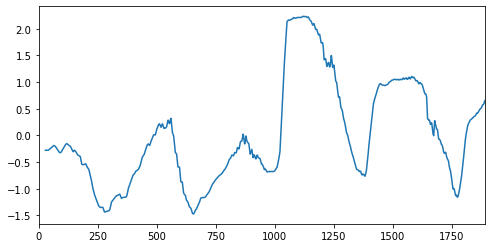

---------------------------------------------------------------


,Ridge,Linear,Lasso,Adaboost,SVR,Stacking
Self data,0.950931,0.950571,-2.167496,0.742319,0.948033,0.841948
Neighborhood data,0.949865,0.949418,-2.167496,0.810572,0.945430,0.857864
Exclusive data,-1.559994,-1.560639,-2.314952,-1.265792,-1.569300,-2.023291



Node: dam_Ubol Ratana, neighbors: ['dam_Pak Mun', 'dam_Huai Kum']


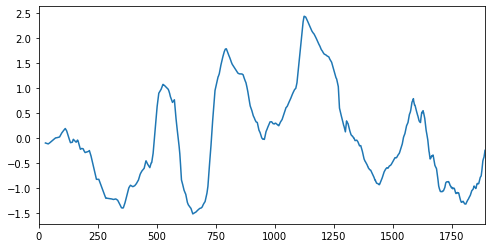

---------------------------------------------------------------


,Ridge,Linear,Lasso,Adaboost,SVR,Stacking
Self data,0.952150,0.951572,-1.361911,0.855012,0.950753,0.839422
Neighborhood data,0.935709,0.934118,-1.361911,0.743094,0.934371,0.807846
Exclusive data,-2.872067,-2.874309,-1.551975,-0.508686,-3.693138,-2.365302



Node: dam_Lam Pao, neighbors: ['dam_Pak Mun']


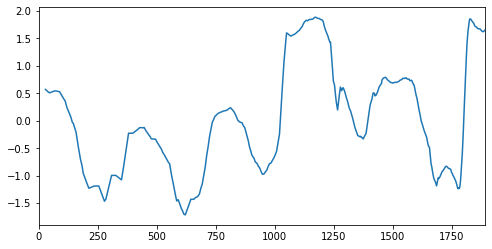

---------------------------------------------------------------


,Ridge,Linear,Lasso,Adaboost,SVR,Stacking
Self data,0.973934,0.973717,-0.994355,0.846401,0.973285,0.907276
Neighborhood data,0.973804,0.973563,-0.994355,0.807059,0.971100,0.915587
Exclusive data,-0.765627,-0.766343,-1.205433,-1.484140,-0.723209,-1.041159



Node: dam_Chulabhorn, neighbors: ['dam_Huai Kum']


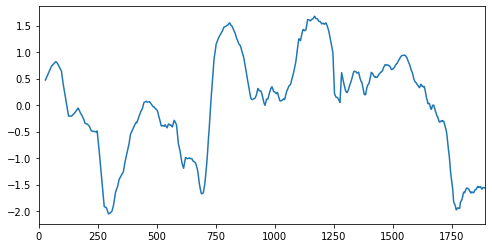

---------------------------------------------------------------


,Ridge,Linear,Lasso,Adaboost,SVR,Stacking
Self data,0.933532,0.933129,-2.051861,0.780783,0.930837,0.763716
Neighborhood data,0.932150,0.931519,-2.051861,0.720206,0.928577,0.765965
Exclusive data,-2.269967,-2.270160,-2.366596,-2.862888,-2.493203,-2.821242



Node: dam_Huai Kum, neighbors: ['dam_Ubol Ratana', 'dam_Chulabhorn']


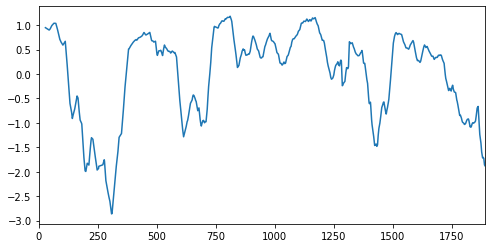

---------------------------------------------------------------


,Ridge,Linear,Lasso,Adaboost,SVR,Stacking
Self data,0.880305,0.879752,-1.060412,0.569744,0.883978,0.705718
Neighborhood data,0.857947,0.855021,-1.060412,0.528558,0.871668,0.757412
Exclusive data,-0.560668,-0.563604,-1.154888,-0.418094,-0.354691,-1.013087



Node: dam_Xe Kaman 3, neighbors: ['dam_Xe Kaman 1']


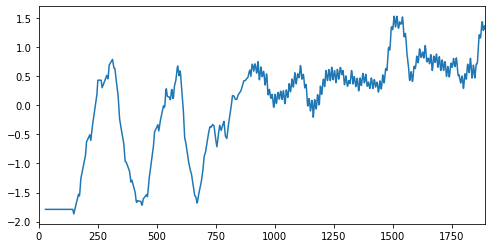

---------------------------------------------------------------


,Ridge,Linear,Lasso,Adaboost,SVR,Stacking
Self data,0.905261,0.904978,-0.973005,0.655504,0.903492,0.839643
Neighborhood data,0.902886,0.900178,-0.973005,0.656416,0.902321,0.847010
Exclusive data,-0.329031,-0.333258,-0.973005,-0.515685,-0.239092,-0.142565



Node: dam_Pak Mun, neighbors: ['dam_Ubol Ratana', 'dam_Lam Pao', 'rw_34', 'dam_Sirindhorn', 'dam_Lamtakhong', 'dam_Lamphraphloeng', 'dam_Lamnangrong']


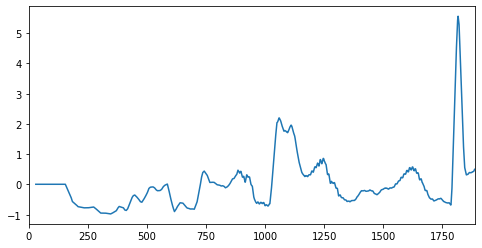

---------------------------------------------------------------


,Ridge,Linear,Lasso,Adaboost,SVR,Stacking
Self data,0.940832,0.940354,-0.528056,0.553493,0.944617,0.615533
Neighborhood data,0.892593,0.872696,-0.528056,0.529306,0.914423,0.318067
Exclusive data,-5.409889,-5.469487,-0.809159,0.031285,-1.062765,-2.946658



Node: dam_Sirindhorn, neighbors: ['dam_Pak Mun']


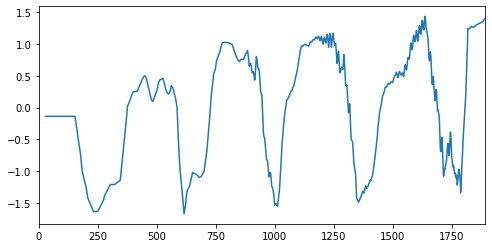

---------------------------------------------------------------


,Ridge,Linear,Lasso,Adaboost,SVR,Stacking
Self data,0.916062,0.914722,-0.481780,0.564479,0.921969,0.853943
Neighborhood data,0.912217,0.908931,-0.481780,0.602576,0.922334,0.779929
Exclusive data,-0.274794,-0.275785,-0.504945,-0.197350,-1.011906,-0.181359



Node: dam_Houayho, neighbors: ['rw_34']


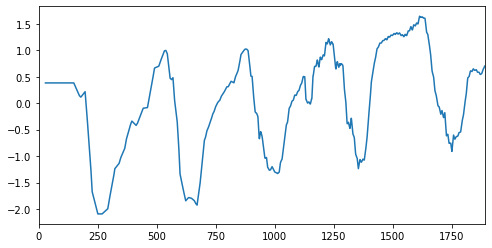

---------------------------------------------------------------


,Ridge,Linear,Lasso,Adaboost,SVR,Stacking
Self data,0.942476,0.942254,-0.851384,0.702346,0.940308,0.828494
Neighborhood data,0.940028,0.939565,-0.851384,0.742254,0.939486,0.819175
Exclusive data,-0.342834,-0.343153,-0.916913,-0.215607,-0.384240,-0.407614



Node: dam_Xe Kaman 1, neighbors: ['dam_Xe Kaman 3', 'rw_34']


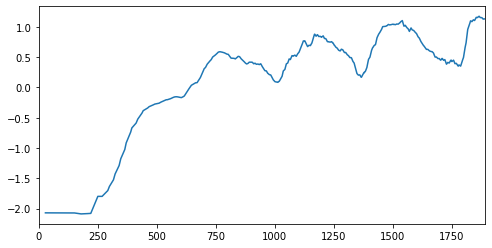

---------------------------------------------------------------


,Ridge,Linear,Lasso,Adaboost,SVR,Stacking
Self data,0.958985,0.961449,-21.754741,-1.036867,0.912003,-1.438739
Neighborhood data,0.958593,0.961004,-21.754741,-3.178049,0.899605,-1.316397
Exclusive data,-13.898497,-13.900454,-21.802263,-14.795685,-12.362794,-18.544764



Node: dam_Lamtakhong, neighbors: ['dam_Pak Mun']


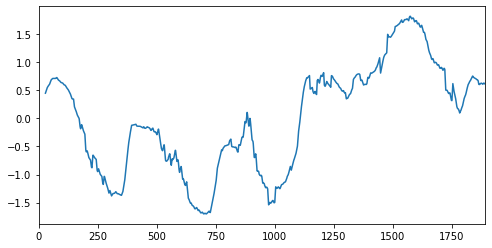

---------------------------------------------------------------


,Ridge,Linear,Lasso,Adaboost,SVR,Stacking
Self data,0.783722,0.782221,-3.514429,0.332239,0.779373,0.393790
Neighborhood data,0.764902,0.759464,-3.514429,0.190809,0.772327,0.313866
Exclusive data,-3.285617,-3.288270,-3.665694,-3.304944,-3.865997,-5.018375



Node: dam_Lamphraphloeng, neighbors: ['dam_Pak Mun']


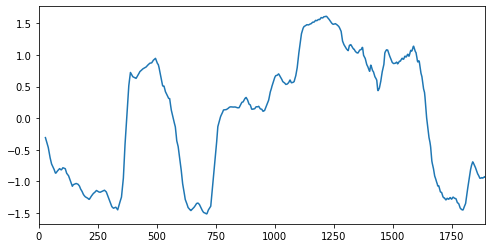

---------------------------------------------------------------


,Ridge,Linear,Lasso,Adaboost,SVR,Stacking
Self data,0.946245,0.946583,-16.827869,0.370010,0.938093,0.549309
Neighborhood data,0.942943,0.942661,-16.827869,0.399139,0.921957,0.499187
Exclusive data,-18.984695,-18.989404,-17.078134,-15.135121,-22.392297,-19.546579



Node: dam_Plei Krong, neighbors: ['dam_Se San IV']


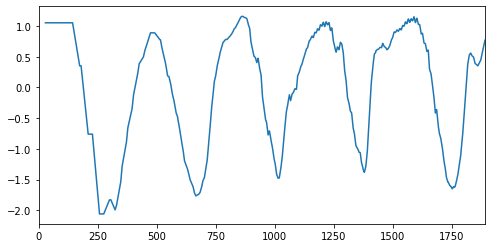

---------------------------------------------------------------


,Ridge,Linear,Lasso,Adaboost,SVR,Stacking
Self data,0.980026,0.979961,-0.379656,0.922443,0.978466,0.948435
Neighborhood data,0.979976,0.979887,-0.379656,0.909534,0.978321,0.953610
Exclusive data,-0.139418,-0.139449,-0.409904,-0.302067,-0.370895,-0.294374



Node: dam_Lamnangrong, neighbors: ['dam_Pak Mun']


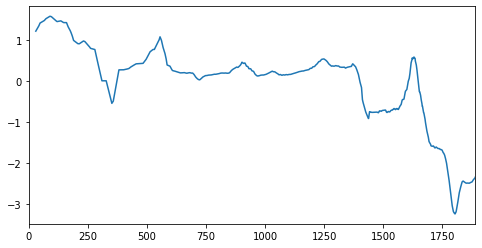

---------------------------------------------------------------


,Ridge,Linear,Lasso,Adaboost,SVR,Stacking
Self data,0.907957,0.907255,-6.586078,-0.322830,0.894439,-0.496587
Neighborhood data,0.886216,0.880848,-6.586078,-0.079659,0.837028,-0.348039
Exclusive data,-16.481753,-16.503683,-7.717827,-24.662768,-5.473522,-47.785258



Node: dam_Se San IV, neighbors: ['dam_Plei Krong', 'dam_Lower Sesan II']


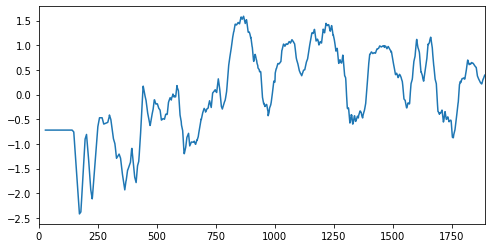

---------------------------------------------------------------


,Ridge,Linear,Lasso,Adaboost,SVR,Stacking
Self data,0.831320,0.831100,-0.873707,0.531232,0.835701,0.705641
Neighborhood data,0.821382,0.814990,-0.873707,0.517505,0.834524,0.704776
Exclusive data,-0.623581,-0.627791,-0.895131,-0.554168,-0.668577,-0.988035



Node: dam_Lower Sesan II, neighbors: ['dam_Se San IV', 'rw_34', 'dam_Ea Soup Thuong', 'dam_Buon Kuop']


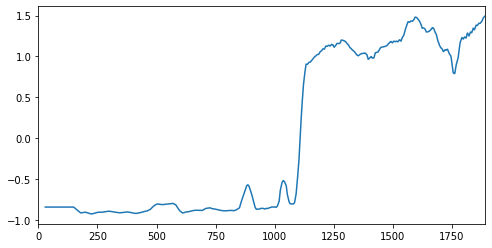

---------------------------------------------------------------


,Ridge,Linear,Lasso,Adaboost,SVR,Stacking
Self data,0.923129,0.924170,-591.323913,0.274508,-0.050247,0.610644
Neighborhood data,0.490354,0.485202,-591.323913,0.155304,-2.644916,0.232850
Exclusive data,-507.561013,-507.723886,-608.512923,-733.515143,-474.605943,-1046.166901



Node: dam_Ea Soup Thuong, neighbors: ['dam_Lower Sesan II']


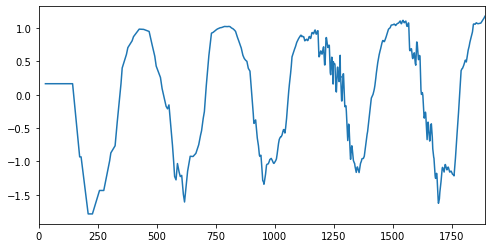

---------------------------------------------------------------


,Ridge,Linear,Lasso,Adaboost,SVR,Stacking
Self data,0.826606,0.824001,-0.395461,0.741927,0.844543,0.727469
Neighborhood data,0.819428,0.811344,-0.395461,0.704145,0.844714,0.703945
Exclusive data,-0.432056,-0.442439,-0.395461,-0.529482,-0.884688,-0.489526



Node: dam_Krong Buk Ha, neighbors: ['dam_Buon Kuop']


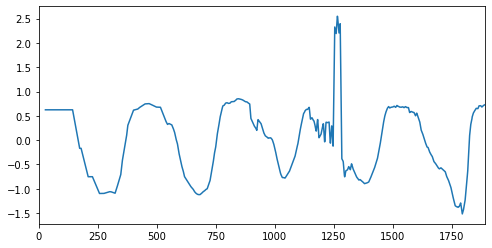

---------------------------------------------------------------


,Ridge,Linear,Lasso,Adaboost,SVR,Stacking
Self data,0.923474,0.923164,-0.271834,0.024159,0.928776,0.606683
Neighborhood data,0.893458,0.892275,-0.271834,0.614655,0.928143,0.357740
Exclusive data,-0.530678,-0.531041,-0.289498,-0.427653,-0.593635,-7.107618



Node: dam_Buon Kuop, neighbors: ['dam_Lower Sesan II', 'dam_Krong Buk Ha']


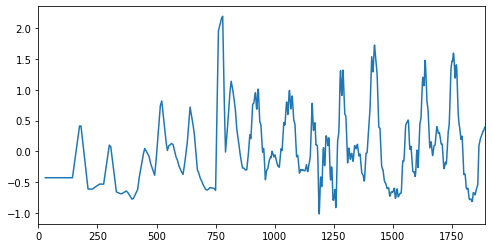

---------------------------------------------------------------


,Ridge,Linear,Lasso,Adaboost,SVR,Stacking
Self data,0.818062,0.817972,-0.207052,0.452842,0.816413,0.028988
Neighborhood data,0.761077,0.742762,-0.207052,-0.473720,0.815878,0.237536
Exclusive data,-0.561436,-0.589120,-0.207052,-0.389562,-0.172571,-1.167817



Node: rw_223, neighbors: ['rw_34']


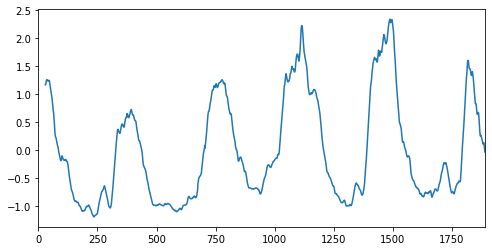

---------------------------------------------------------------


,Ridge,Linear,Lasso,Adaboost,SVR,Stacking
Self data,0.942190,0.940967,-0.46338,0.913414,0.944487,0.906717
Neighborhood data,0.939728,0.938102,-0.46338,0.918525,0.942338,0.911524
Exclusive data,0.483022,0.482091,-0.47031,0.495606,0.464457,0.416569



Node: rw_34, neighbors: ['rw_239', 'dam_Nam Pung', 'dam_Pak Mun', 'dam_Houayho', 'dam_Xe Kaman 1', 'dam_Lower Sesan II', 'rw_223']


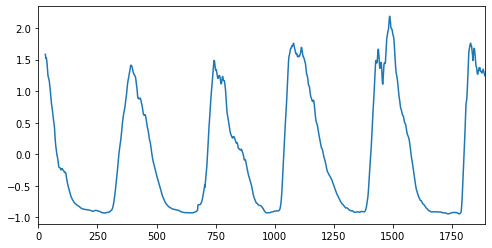

---------------------------------------------------------------


,Ridge,Linear,Lasso,Adaboost,SVR,Stacking
Self data,0.955369,0.953849,-1.172643,0.908911,0.952294,0.820463
Neighborhood data,0.929352,0.921801,-1.172643,0.914397,0.944149,0.785417
Exclusive data,-0.478961,-0.483040,-1.204539,0.315881,-0.561682,-0.826033


In [22]:
period = 60
future = 1
for node in river_network.nodes:
    adj = river_network.adj[node]
    adj = list(map(lambda x: river_network.nodes[x]['attr']['name'], adj.keys()))
    node = river_network.nodes.get(node)['attr']['name']
    print(f'Node: {node}, neighbors: {adj}')
    plt.figure(figsize = (8, 4))
    df_transformed[node].rolling(30).mean().plot(use_index = True)
    plt.show()
    print('---------------------------------------------------------------')
    res = pd.concat([survey(df_transformed, node, [node], regressors, period, future),
                     survey(df_transformed, node, [node] + adj, regressors, period, future),
                     survey(df_transformed, node, adj, regressors, period, future)
                    ], axis = 0)
    res.index = ['Self data', 'Neighborhood data', 'Exclusive data']
    display(res)
    print('===============================================================', end = '\n\n')